# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Feature engineering
4. Modelling

---

## 1. Import packages

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [2]:
df = pd.read_csv('C:/Users/Avalon/Documents/Data Science/Lazarus/Boston Consulting Group - Data Science Analytics/Task 3 - Feature Engineering & Modelling/clean_data_modeling.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var  \
0                    0.131756                0.092638   
1                    0.147600                0.000000   
2                    0.167798                0.088409   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.036909                   42.497907   
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0               12.218665                    8.145777               42.629663   
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   

  mean_3m_price_peak  mean_3m_price_med_peak  churn  
0          12.311304                8.182687      1  
1           0.000000                0.000000      0  
2           0.088409                0.000000      0  

[3 rows x 54 columns]

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [6]:
df = pd.merge(df, diff, on='id')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.036909                   42.497907   
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   
3                    0.000000                   44.444710   
4                    0.073719                   40.728885   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0               12.218665                    8.145777               42.629663   
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   
3                0.000000                    0.000000               44.593296   
4               24.437330                   16.291555               40.848791   

   mean_3m_price_peak  mean_3m_price_med_peak churn  \
0           12.311304                8.182687     1   
1            0.000000                0.000000     0   
2            0.088409                0.000000     0   
3            0.000000                0.000000     0   
4           24.539003               16.365274     0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.003767                        0.177779  
2                        -0.004670                        0.177779  
3                        -0.004547                        0.177779  
4                        -0.006192                        0.162916  

[5 rows x 56 columns]

___

### Average price changes across periods

An improvement that can be made to the feature created by our colleague is to compute the mean price fluctuations for each individual time period, rather than for the entire year.

In [7]:
# Group the mean prices by company for each time period.

mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [8]:
# Compute the average change between adjacent time periods.

mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [9]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...   

   mean_3m_price_med_peak  churn  offpeak_diff_dec_january_energy  \
0                8.182687      1                         0.020057   
1                0.000000      0                        -0.003767   
2                0.000000      0                        -0.004670   
3                0.000000      0                        -0.004547   
4               16.365274      0                        -0.006192   

   offpeak_diff_dec_january_power  off_peak_peak_var_mean_diff  \
0                        3.700961                     0.024038   
1                        0.177779                     0.142485   
2                        0.177779                     0.082090   
3                        0.177779                     0.151210   
4                        0.162916                     0.020536   

   peak_mid_peak_var_mean_diff  off_peak_mid_peak_var_mean_diff  \
0                     0.034219                         0.058257   
1                     0.007124                         0.149609   
2                     0.088421                         0.170512   
3                     0.000000                         0.151210   
4                     0.030773                         0.051309   

  off_peak_peak_fix_mean_diff  peak_mid_peak_fix_mean_diff  \
0                   18.590255                     7.450670   
1                   44.311375                     0.000000   
2                   44.385450                     0.000000   
3                   44.400265                     0.000000   
4                   16.275263                     8.137629   

   off_peak_mid_peak_fix_mean_diff  
0                        26.040925  
1                        44.311375  
2                        44.385450  
3                        44.400265  
4                        24.412893  

[5 rows x 62 columns]

The aforementioned feature could prove beneficial due to the additional level of detail it adds to the previous iteration discovered by our colleague. The newly created features, which consider the average price differences for various time periods (off-peak, peak, and mid-peak), provide a more nuanced analysis as compared to observing changes across an entire year. The Dec-Jan feature may uncover broad trends that extend throughout the year, while the inter-time-period features may shed light on more granular patterns that occur between months.

___

### Max price changes across periods and months

An alternative method of improving the feature developed by our colleague is to examine the largest price fluctuations that occur during different periods and months.

In [10]:
# Combine the mean prices by company for each time period.

mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [12]:
# Compute the average price change between two successive time periods.

mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [13]:
# Determine the highest monthly price difference among different time periods.

max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [14]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   
2                         0.170512                    44.385450   
3                         0.151210                    44.400265   
4                         0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     7.450670                        26.040925   
1                     0.000000                        44.311375   
2                     0.000000                        44.385450   
3                     0.000000                        44.400265   
4                     8.137629                        24.412893   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.151367                            0.085483   
2                            0.084587                            0.089162   
3                            0.153133                            0.000000   
4                            0.022225                            0.033743   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                          44.266930   
1                                0.151367                          44.444710   
2                                0.172468                          44.444710   
3                                0.153133                          44.444710   
4                                0.055866                          16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            8.145775                                44.26693  
1                            0.000000                                44.44471  
2                            0.000000                                44.44471  
3                            0.000000                                44.44471  
4                            8.145775                                24.43733  

[5 rows x 68 columns]

I came up with the idea of computing the highest price variation between months and time periods as a valuable feature because I considered the perspective of a PowerCo customer. As a Utilities consumer, unexpected fluctuations in prices between months can be quite frustrating, and a substantial rise in prices over a brief period could potentially lead me to consider alternative utilities providers for better pricing. Given that we aim to forecast customer churn in this particular scenario, I deemed this feature to be noteworthy.

___

## 4. Additional Feature Engineering

In this section, we will explore additional methods for feature engineering and various techniques to transform the data to address its statistical characteristics, including skewness, that were previously identified.

### Tenure

The duration for which a company has been a PowerCo customer.

In [17]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
3       0.143836
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

The analysis indicates that companies with a tenure of four months or less are considerably more prone to churn than those who have been PowerCo customers for a longer duration. Notably, there is a significant rise in the likelihood of customer churn when transitioning from four to five months of tenure, representing a 4% difference in probability, which is greater than other sequential tenure differences. This observation could suggest that achieving a tenure of more than four months is a significant milestone towards retaining customers over the long run.

Given the association between customer tenure and churn likelihood, it is a valuable feature to consider in our modeling efforts.

### Converting dates to months

- months_activ: The total number of months the company was active until the reference date of January 2016.

- months_to_end: The total number of months left in the contract until the reference date of January 2016.

- months_modif_prod: The number of months that have elapsed since the last modification until the reference date of January 2016.

- months_renewal: The number of months that have passed since the last renewal until the reference date of January 2016.

In [18]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [21]:
reference_date = datetime.datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

The datetime format of the dates is not useful for predictive modelling purposes, so we needed to engineer some new features from them that may be more informative for predicting churn. We created the feature "months_activ" to capture the number of months a company has been an active client of PowerCo, as we intuitively believe that clients who have been with PowerCo for a longer time may have more loyalty and are therefore less likely to churn. Another feature we created is "months_to_end," which captures the number of months left on a company's contract until it ends, and we believe this may reveal patterns and behaviours about the timing of churn.

The feature "months_modif_prod" captures the number of months since a company last made changes to their contract, and we believe that clients who make recent updates to their contract may be more satisfied or engaged with PowerCo, making them less likely to churn. Finally, the feature "months_renewal" captures the number of months since a company last renewed their contract, which we believe may indicate a level of commitment and engagement with PowerCo, and therefore may be informative for predicting churn. Overall, these features are intended to capture the degree of engagement, loyalty, and commitment of clients to PowerCo, which we believe are important factors to consider when predicting churn.

In [22]:
# We can discard the datetime columns that we used for feature engineering since they are no longer needed.

remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  ...  peak_mid_peak_var_max_monthly_diff  \
0                     1.78  ...                            0.085483   
1                    16.27  ...                            0.085483   
2                    38.72  ...                            0.089162   
3                    19.83  ...                            0.000000   
4                   131.73  ...                            0.033743   

   off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                           44.266930   
1                                0.151367                           44.444710   
2                                0.172468                           44.444710   
3                                0.153133                           44.444710   
4                                0.055866                           16.291555   

  peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                           8.145775                                44.26693   
1                           0.000000                                44.44471   
2                           0.000000                                44.44471   
3                           0.000000                                44.44471   
4                           8.145775                                24.43733   

   tenure  months_activ  months_to_end  months_modif_prod  months_renewal  
0       3            30              5                  2               6  
1       7            76              7                 76               4  
2       6            68              3                 68               8  
3       6            69              2                 69               9  
4       6            71              2                 71               9  

[5 rows x 69 columns]

### Converting Boolean data

has_gas

Column is currently categorical, but we want to transform it into a binary flag, indicating whether a customer has gas service or not.

In [23]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081887

The "has_gas" column is a useful feature to include in the model because it indicates whether a customer has purchased gas from PowerCo or not. Customers who have multiple products with PowerCo, such as gas and electricity, may be more loyal to the brand and less likely to churn. On the other hand, customers who only purchase electricity may be more likely to churn. This is supported by the observation that customers who do not buy gas are almost 2% more likely to churn than those who also buy gas.

### Transforming categorical data

To use categorical features in a predictive model, they must be encoded into numerical representations that are compact and discriminative. One simple approach is label encoding, which maps each category to an integer. However, this approach may introduce an order into the feature that does not exist. Another method is one-hot encoding, which creates a new feature for each unique value of a categorical column. Each column is then filled with either a 1 or a 0 to indicate if the company belongs to that category or not. This approach is more appropriate when the categories are not ordered and there are not too many unique values.

### channel_sales

In [24]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

From the given column with 8 categories, we will create 8 dummy variables. However, we noticed that the last 3 categories have very few occurrences, only 11, 3, and 2 respectively, when compared to the size of the dataset which is about 14,000 rows. As a result, these dummy variables will have values that are almost entirely 0, providing very little predictive power to the model, since they are almost constant.

Due to the low occurrences of the last 3 categories in the original column, creating dummy variables for them would result in almost all values being 0, which would provide very little predictive power to the model. Therefore, we have decided to drop these 3 dummy variables.

In [25]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57         0         54946   
1           1  d29c2c54acc38ff3c0614d0a653813dd      4660             0   
2           2  764c75f661154dac3a6c254cd082ea7d       544             0   
3           3  bba03439a292a1e166f80264c16191cb      1584             0   
4           4  149d57cf92fc41cf94415803a877cb4b      4425             0   

   cons_last_month  forecast_cons_12m  forecast_cons_year  \
0                0               0.00                   0   
1                0             189.95                   0   
2                0              47.96                   0   
3                0             240.04                   0   
4              526             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  tenure  months_activ  months_to_end  \
0                        0.114481  ...       3            30              5   
1                        0.145711  ...       7            76              7   
2                        0.165794  ...       6            68              3   
3                        0.146694  ...       6            69              2   
4                        0.116900  ...       6            71              2   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  2               6                0   
1                 76               4                1   
2                 68               8                0   
3                 69               9                0   
4                 71               9                1   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

  channel_usilxuppasemubllopkaafesmlibmsdf  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0  

[5 rows x 73 columns]

### origin_up

In [26]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

As with the channel_sales feature, the output above shows that the last three categories have very low frequency. Therefore, we will create dummy variables for this feature, but we will remove these last three categories from the features as they may not add much predictive power to the model due to their low frequency.

In [27]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57         0         54946   
1           1  d29c2c54acc38ff3c0614d0a653813dd      4660             0   
2           2  764c75f661154dac3a6c254cd082ea7d       544             0   
3           3  bba03439a292a1e166f80264c16191cb      1584             0   
4           4  149d57cf92fc41cf94415803a877cb4b      4425             0   

   cons_last_month  forecast_cons_12m  forecast_cons_year  \
0                0               0.00                   0   
1                0             189.95                   0   
2                0              47.96                   0   
3                0             240.04                   0   
4              526             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  months_modif_prod  months_renewal  \
0                        0.114481  ...                  2               6   
1                        0.145711  ...                 76               4   
2                        0.165794  ...                 68               8   
3                        0.146694  ...                 69               9   
4                        0.116900  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 75 columns]

### Transforming numerical data

In the previous exercise, we observed that some variables in our dataset had highly skewed distributions. The reason why it's important to treat skewness is that some predictive models assume that all variables are independent and normally distributed. Such models are called parametric models. Skewness can also affect the speed at which predictive models converge to their best solution. 

To address skewness, we can apply transformations like square root, cubic root, or logarithm to continuous numeric columns. For this specific dataset, we will use the logarithmic transformation for the positively skewed features. It's important to note that we cannot apply log to a value of 0, so we will add a constant of 1 to all the values before applying the transformation. Before applying the transformation, we want to compare the statistics of the skewed features before and after the transformation.

In [28]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460500e+04  1.460500e+04     14605.000000       14605.000000   
mean   1.592303e+05  2.809108e+04     16091.371448        1868.638618   
std    5.734836e+05  1.629786e+05     64366.262314        2387.651549   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674000e+03  0.000000e+00         0.000000         494.980000   
50%    1.411600e+04  0.000000e+00       793.000000        1112.610000   
75%    4.076400e+04  0.000000e+00      3383.000000        2402.270000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean          1399.858747                  0.966450                63.090448   
std           3247.876793                  5.108355                66.166636   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.800000   
75%           1746.000000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

The majority of these features have a relatively high standard deviation.

In [29]:
# Apply log10 transformation

df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [30]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14605.000000  14605.000000     14605.000000       14605.000000   
mean       4.223945      0.778978         2.264801           2.962162   
std        0.884545      1.716828         1.769266           0.683612   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.753966      0.000000         0.000000           2.695464   
50%        4.149742      0.000000         2.899821           3.046733   
75%        4.610287      0.000000         3.529430           3.380803   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean             1.784733                  0.966450                 1.517233   
std              1.584972                  5.108355                 0.571489   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296665   
75%              3.242293                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

Now that we have transformed the skewed features using the logarithm transformation, we can observe that the standard deviation for most of the features has decreased. This is an indication that these features are now more stable and predictable.

To confirm this, let's take a look at the distributions of some of these features as well.

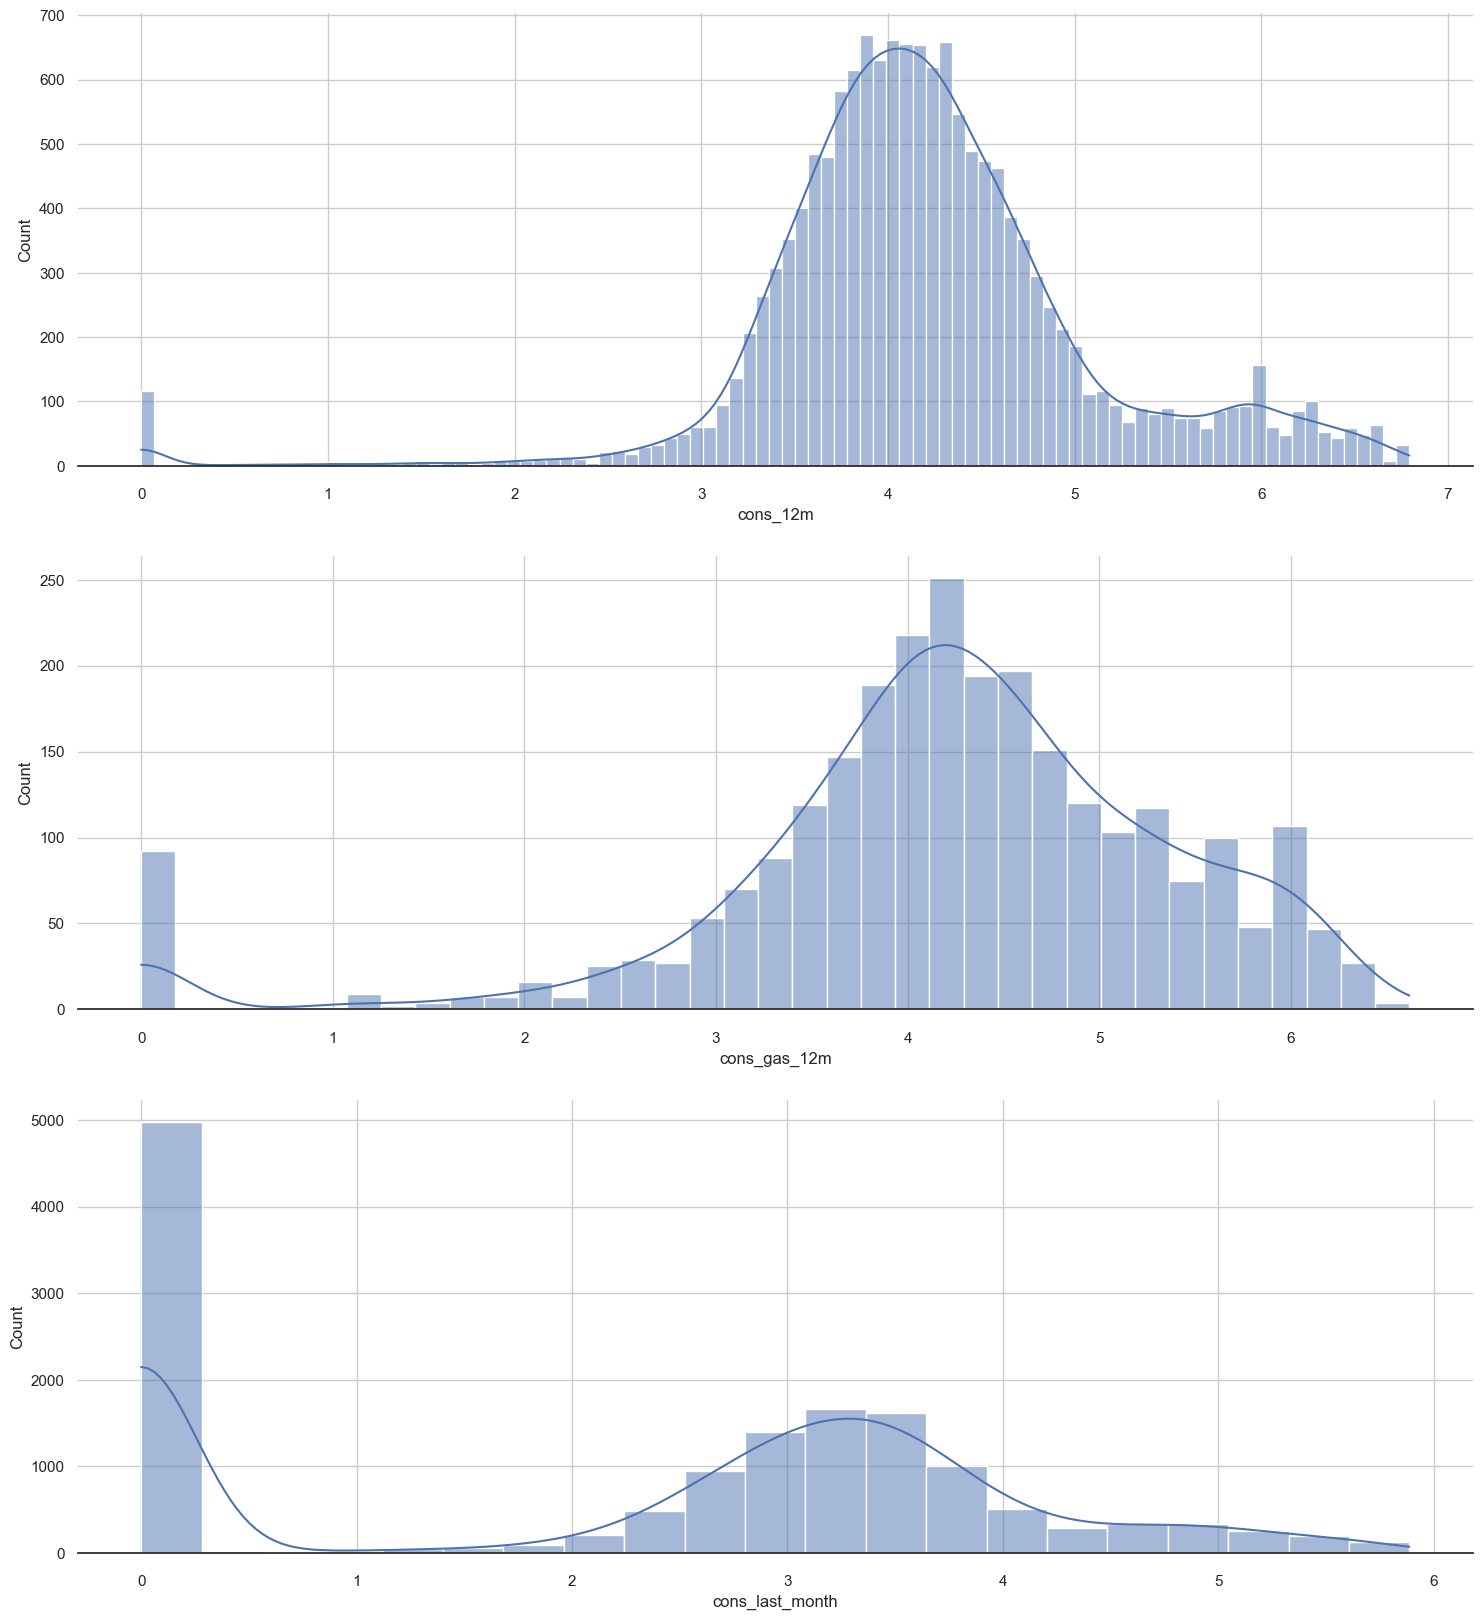

In [68]:
sns.set_style("white") # Set the style to "white"
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))

# Plot histograms
sns.histplot((df["cons_12m"].dropna()), ax=axs[0], kde=True)
sns.histplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1], kde=True)
sns.histplot((df["cons_last_month"].dropna()), ax=axs[2], kde=True)

# Remove spines and ticks
sns.despine(left=True)
for ax in axs:
    ax.tick_params(left=False, bottom=False)
    ax.grid(True)

plt.show()

### Correlations

Feature engineering is an iterative process that involves creating new features and transforming existing ones to enhance the predictive power of the model. However, it is important to ensure that the features are not highly correlated, as this can indicate that they share similar information and violate the assumption of independence in parametric predictive models. Ideally, we want a set of features with high correlation to the target variable (churn) and low correlation to the independent variables. Therefore, we need to examine the correlation between all features within the dataset to identify any highly correlated features.

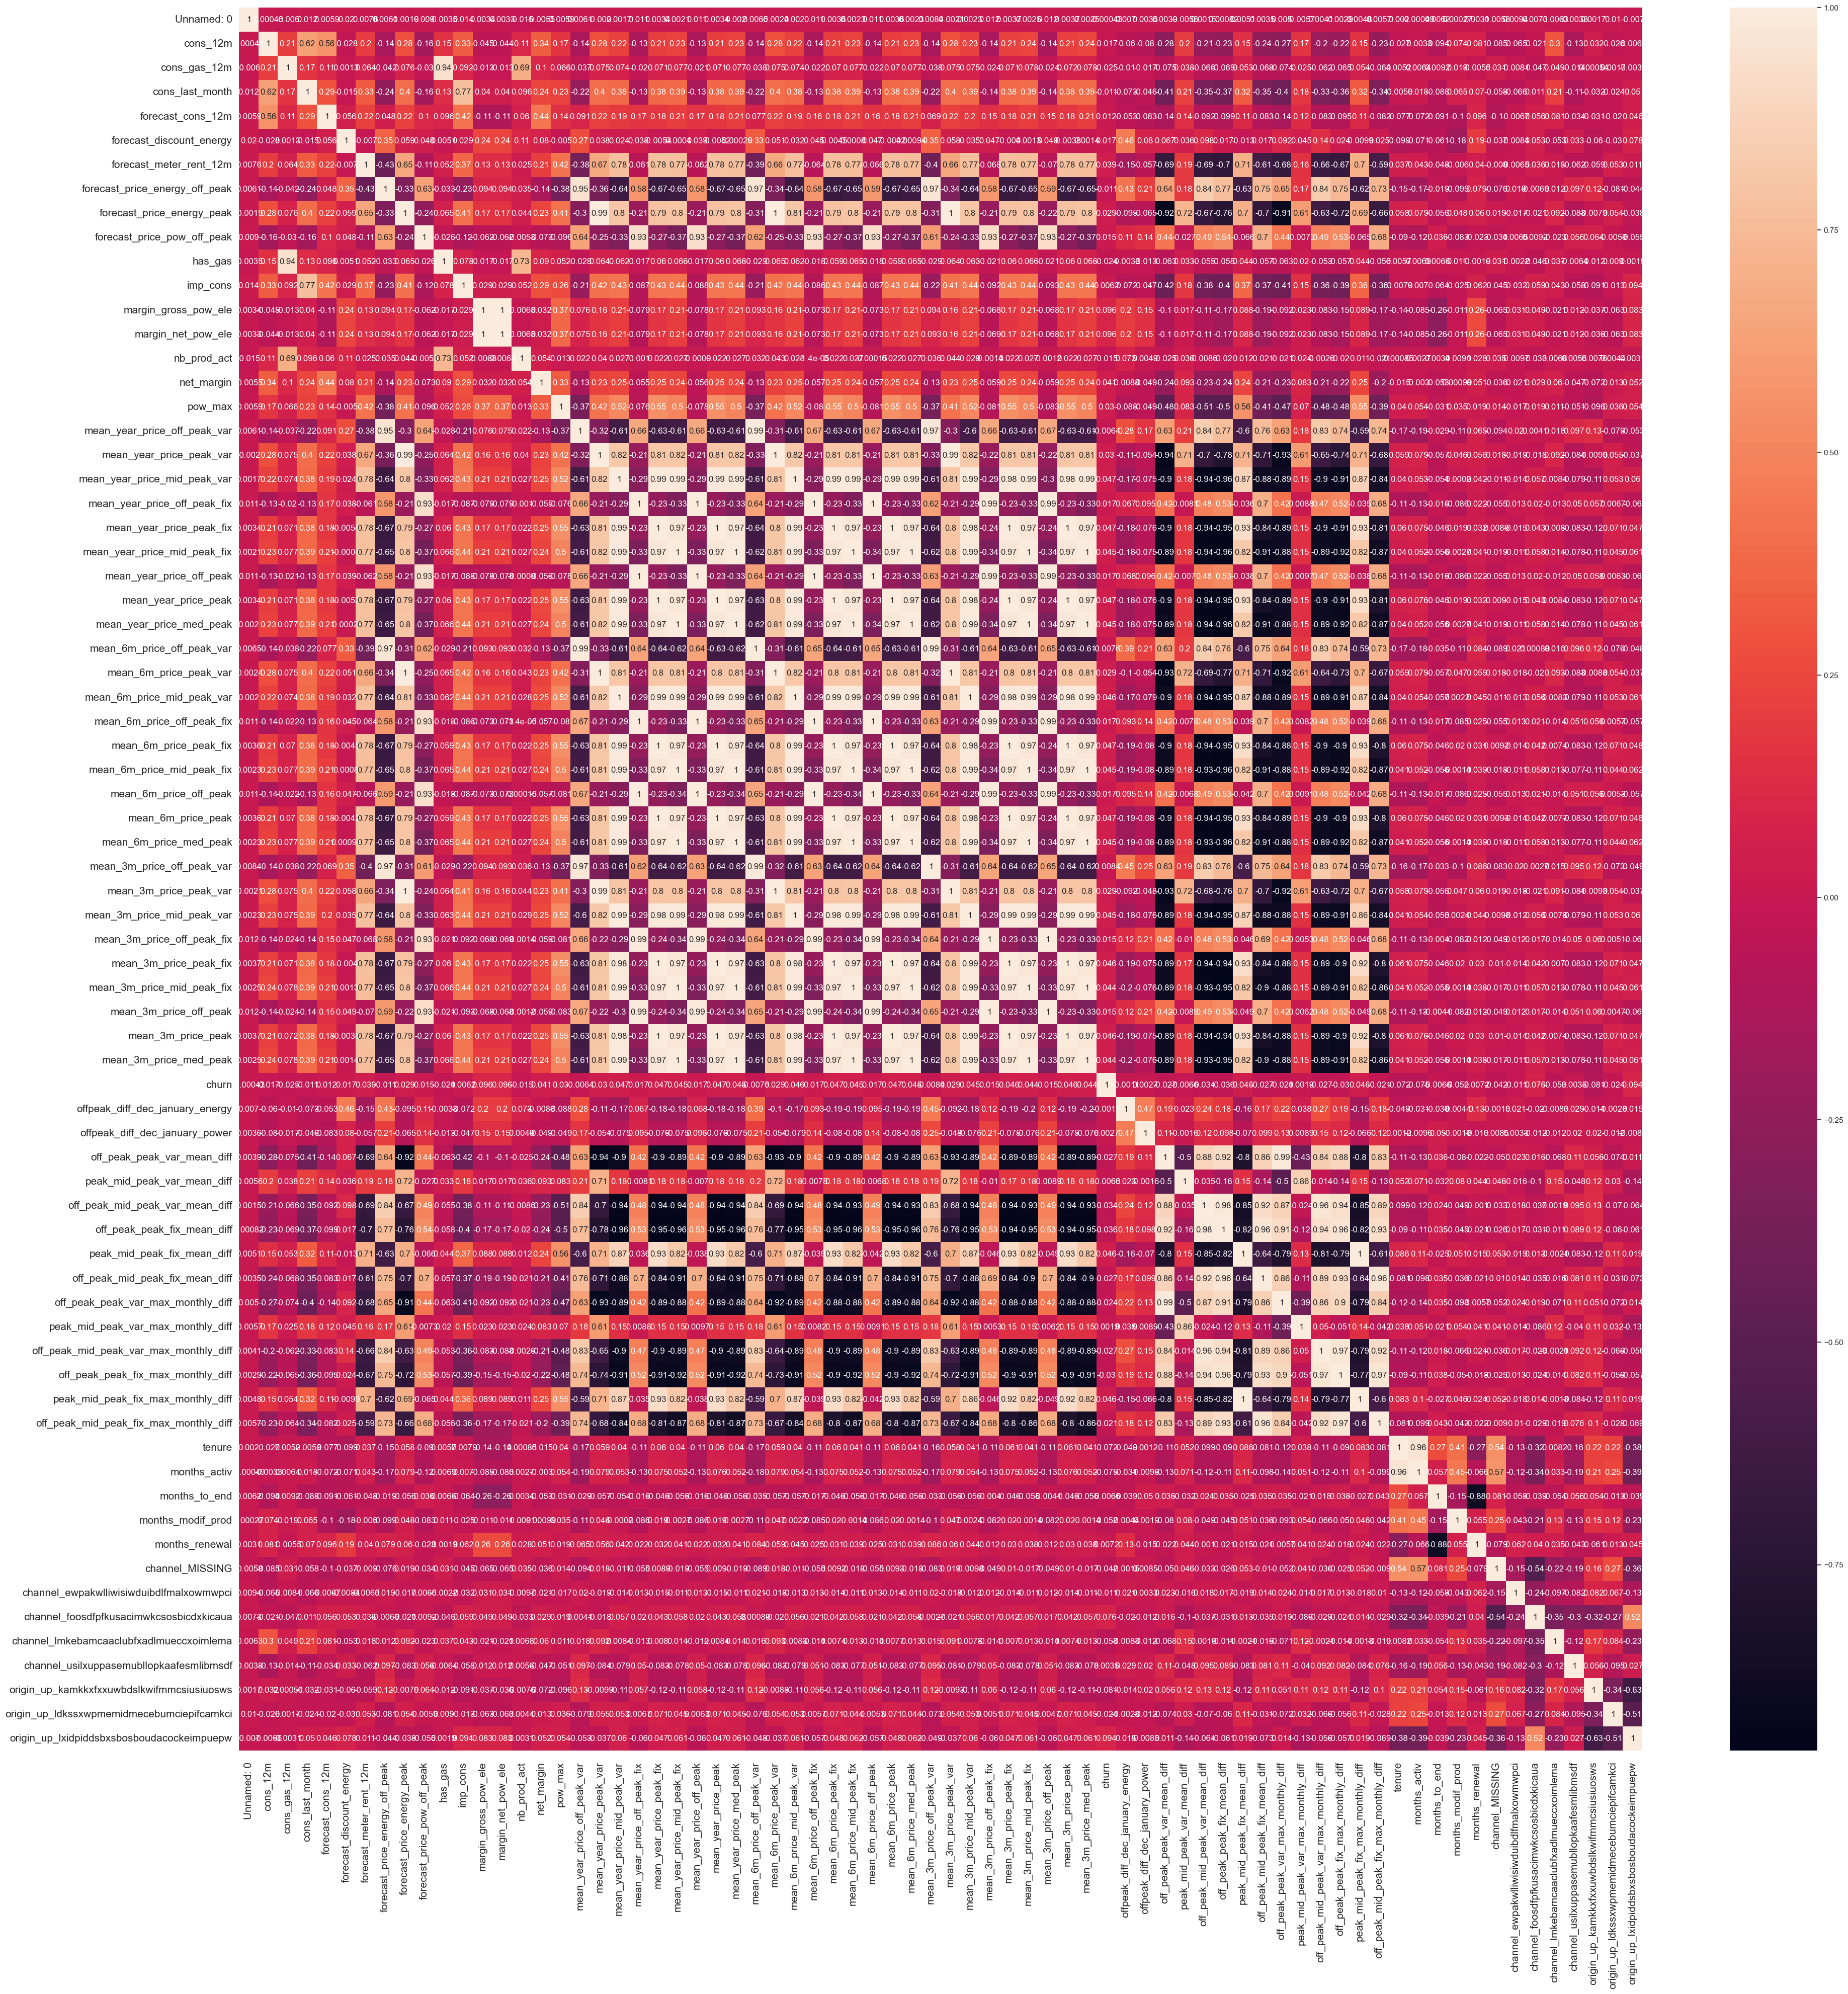

In [69]:
correlation = df.corr()

# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

At this point, I will exclude two variables from the dataset because they are highly correlated with other independent features.

In [45]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944   
1           1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000   
2           2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000   
3           3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000   
4           4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000   

   cons_last_month  forecast_cons_12m  forecast_discount_energy  \
0         0.000000           0.000000                       0.0   
1         0.000000           2.280920                       0.0   
2         0.000000           1.689841                       0.0   
3         0.000000           2.382089                       0.0   
4         2.721811           2.650065                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 0.444045                        0.114481   
1                 1.237292                        0.145711   
2                 1.599009                        0.165794   
3                 1.318689                        0.146694   
4                 2.122969                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                  2               6   
1                    0.000000  ...                 76               4   
2                    0.087899  ...                 68               8   
3                    0.000000  ...                 69               9   
4                    0.100015  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 73 columns]

## 5. Modelling

At this point, we have a preprocessed dataset that includes engineered features, and we can proceed to train a predictive model. It is important to note that we only need to train a Random Forest classifier, as this is the model that we have selected based on our analysis and evaluation of different models.

In [46]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data Sampling

To simulate real-life situations, we split our dataset into training and test samples. The training set is used to train our predictive model while the test set is used to generate predictions for data points that the model has not seen before. This helps us evaluate how well our model can generalize to new data. The usual percentage to set aside for testing is between 20-30%. In this example, we will use a 75-25% split, with 75% of the data dedicated to training and 25% for testing.

In [47]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14605, 71)
(14605,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10953, 71)
(10953,)
(3652, 71)
(3652,)


### Training Model

In this example, we are using a Random Forest classifier, which belongs to the ensemble algorithm category. A Random Forest is a collection of decision trees, which are tree-based learning algorithms. As a data scientist, you can control the size of the forest by specifying the number of decision trees you want to include.

Ensemble algorithms are powerful because of the laws of averaging, weak learners, and the central limit theorem. A single decision tree may overfit or underfit the data, but with ensemble methods, we can train thousands of decision trees, each learning different patterns from different splits of the data. It's like asking thousands of people to learn how to code, resulting in different answers, methods, and styles. The weak learner concept is important here, where the learners are trained not to overfit but to learn weak patterns in the data. When these weak learners are combined, they form a highly predictive pool of knowledge. This is a practical example of how many brains are better than one.

The Random Forest classifier is an ensemble algorithm that is composed of multiple decision trees. It can be configured to include a specific number of decision trees that are trained on different samples of data with varying parameters. The predictive power of the Random Forest is determined by the collective output of all of its decision trees.

Advantages of using the Random Forest classifier include:

1. Rule-based approach: The Random Forest classifier uses a rule-based approach instead of a distance calculation. As a result, there is no need to scale features.

2. Non-linear parameters: The Random Forest classifier is better able to handle non-linear parameters than linear-based models.

However, there are also some disadvantages to using the Random Forest classifier:

1. High computational power: To train a Random Forest on a large dataset, a significant amount of computational power is needed since the algorithm requires building a whole ensemble of estimators.

2. Longer training time: The complexity and size of the ensemble can increase training time compared to other models.

In [50]:
model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

The scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html provides extensive information on the Random Forest classifier and the parameters that can be used when training a model. In this example, the n_estimators parameter is set to 1000, which means that the random forest consists of 1000 decision trees. However, there are several other parameters that can be fine-tuned to optimize the performance of the random forest. This process of finding the optimal combination of parameters is typically a manual task that involves exploration, trial and error, and is not covered in this notebook.

### Evaluation

In order to evaluate the performance of our trained model, we will use three metrics: accuracy, precision, and recall. While accuracy can be a good measure of overall performance, it may not be sufficient in all cases. For example, in a medical context where we are predicting the presence of a disease, a high number of false positives could lead to unnecessary treatments and resources being allocated to the wrong patients, while false negatives could result in patients missing out on necessary treatments.

To account for this, we use precision and recall metrics. Precision measures the ability of the model to correctly identify positive cases, while recall measures the ability of the model to correctly identify all positive cases. By using these metrics, we can get a more nuanced view of the performance of our model and its potential impact in real-world scenarios.

In [51]:
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [52]:
y_test.value_counts()

0    3279
1     373
Name: churn, dtype: int64

In [53]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 16
False positives: 0
True negatives: 3279
False negatives: 357

Accuracy: 0.9022453450164294
Precision: 1.0
Recall: 0.04289544235924933


After evaluating the performance of the model on the test dataset, several points can be highlighted:

- About 10% of the rows in the test set are churners.
- The true negative value is very high at 3282, indicating that the model can accurately predict negative cases (churn=0).
- False negatives are high at 348, indicating that the model is predicting clients as not churning when in fact they did.
- False positives are very low at only 4 cases, indicating that the model is accurately predicting clients who did not churn.
- The true positive value is poor with only 18 correctly predicted out of 366 clients who churned in the test dataset, indicating that the model is struggling to identify positive samples.
- The accuracy score is high, but it is misleading since it does not provide a complete picture of the model's performance.
- The precision score is not bad at 0.82, but it could be improved.
- The recall score is very poor, indicating that the model has a significant weakness in identifying churners.
- The current set of features may not be discriminative enough to clearly distinguish between churners and non-churners, so a data scientist would need to go back to feature engineering and/or parameter optimization to improve the model's performance.

In conclusion, while the model can accurately identify clients who did not churn, it struggles to predict cases where clients did churn. This suggests that more predictive features are needed to improve the model's ability to distinguish between churners and non-churners.

### Model understanding

One way to gain insights into the performance of a model is to examine its feature importances. These importances reflect the relative importance of each feature in the predictive model. There are various methods to calculate feature importances, but in the case of a Random Forest classifier, we can extract them directly from the trained model using a built-in method. Specifically, the feature importance score in Random Forest represents the number of times a given feature is used for splitting across all trees in the forest.

In [54]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

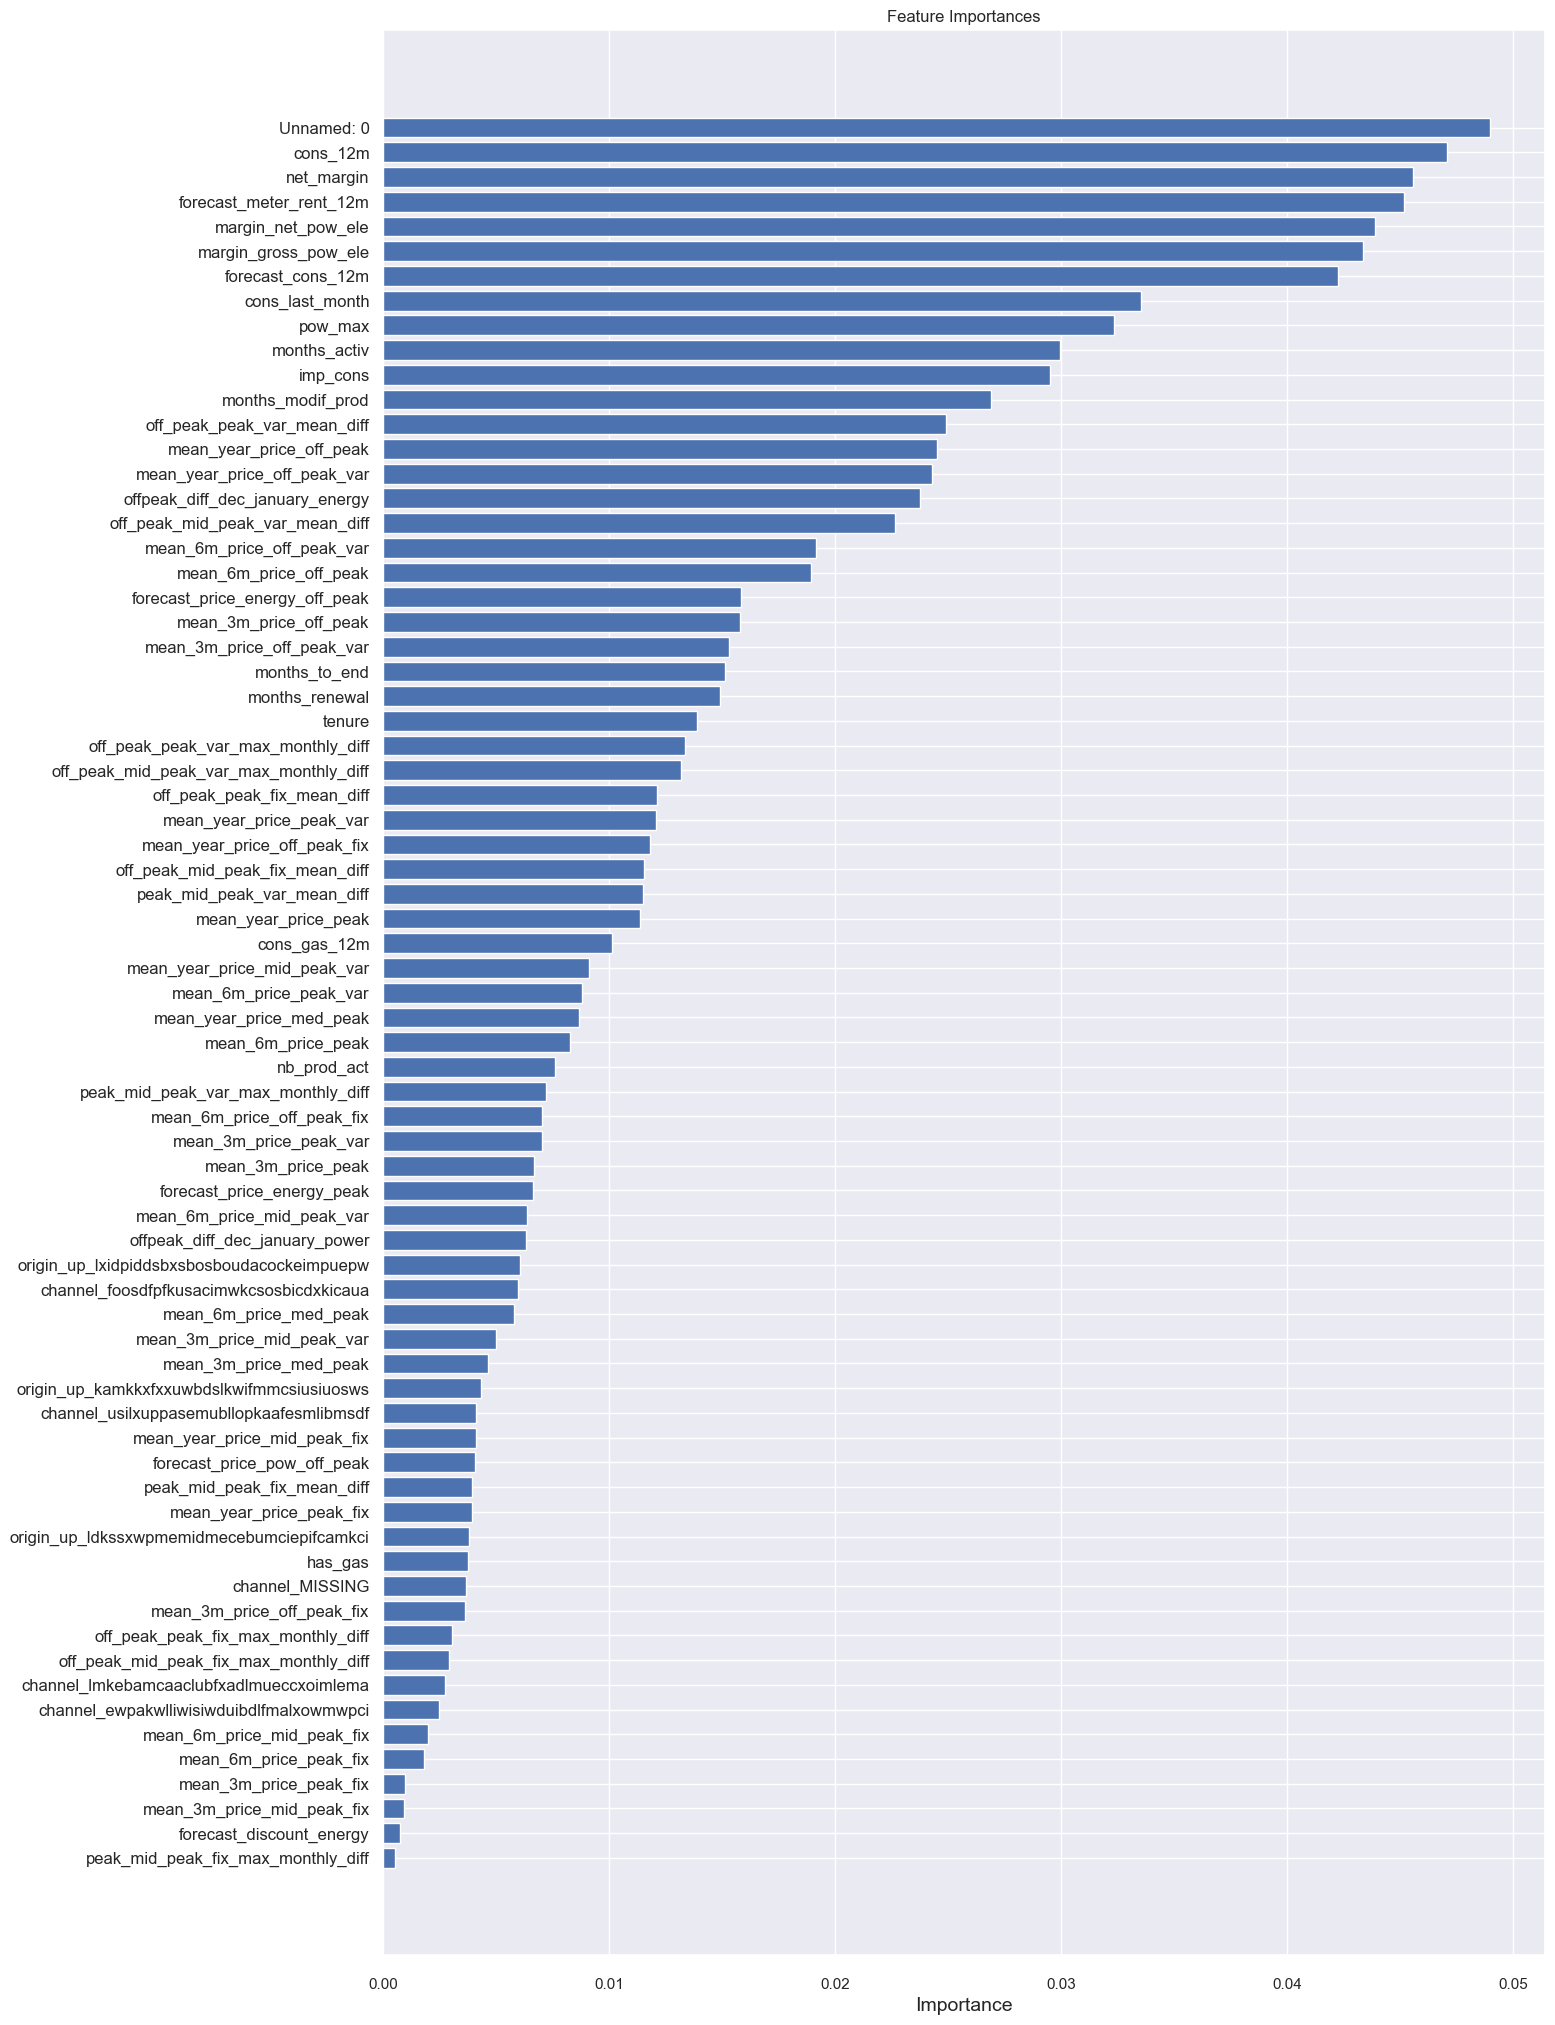

In [71]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

Here's a possible rephrased version of the text with some points:

1. The model suggests that net margin and consumption over the past 12 months are the top drivers for customer churn.
2. The margin on power subscription is also an influential driver of churn.
3. Time-related features such as the customer's tenure, the number of months they have been active, and the duration since they updated their contract are influential factors in customer churn.
4. The feature recommended by our colleague is in the top half of influential features, but some features built off of it perform even better.
5. Our price sensitivity features are present in the model but are not the main drivers of customer churn.

The final point is significant because it is related to our initial hypothesis.

> Can customer's price sensitivity be identified as a driving factor behind churn?

Although the feature importances indicate that price sensitivity is not a primary driver for customer churn, it still has some influence as a weak contributor. However, to draw a conclusive answer, further experimentation is necessary.

In [72]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [73]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')